In [1]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('homeprices.csv')

In [6]:
df.head()

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000


**Using pandas to create dummy variables**


In [21]:
dummies = pd.get_dummies(df.town)
dummies = dummies.astype(int)
dummies.head()

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [22]:
new_df = pd.concat([df,dummies],axis='columns')
new_df.head()

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0


In [23]:
final_df = new_df.drop(['town'], axis='columns')
final_df.head()

,area,price,monroe township,robinsville,west windsor
0,2600,550000,1,0,0
1,3000,565000,1,0,0
2,3200,610000,1,0,0
3,3600,680000,1,0,0
4,4000,725000,1,0,0


**Dummy Variable Trap**


In [24]:
final = final_df.drop(['west windsor'], axis='columns')
final.head()

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0


In [25]:
X = final.drop(['price'], axis = 'columns')
X.head()

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0


In [26]:
y = final.price
y.head()

,price
0,550000
1,565000
2,610000
3,680000
4,725000


In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [30]:
model.fit(X,y)


LinearRegression()

In [32]:
model.predict(X)

array([539709.7398409 , 590468.71640508, 615848.20468716, 666607.18125134,
       717366.15781551, 579723.71533005, 605103.20361213, 668551.92431735,
       706621.15674048, 565396.15136531, 603465.38378844, 628844.87207052,
       692293.59277574])

In [33]:
model.predict([[3400,0,0]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.66845839])

In [34]:
model.score(X,y)

0.9573929037221872

**Using sklearn OneHotEncoder**


In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [66]:
dfle = df
dfle.town = le.fit_transform(dfle.town)
dfle.head()

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000


In [67]:
X = dfle[['town','area']].values
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]])

In [68]:
y = dfle.price.values
y

array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
       710000, 575000, 600000, 620000, 695000])

In [69]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [70]:
ct = ColumnTransformer([('town', OneHotEncoder(), [0])], remainder='passthrough')

In [71]:
X = ct.fit_transform(X)

X




array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [72]:
X = X[:,1:]
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [73]:
model.fit(X,y)


LinearRegression()

In [74]:
model.predict([[0, 1, 3400]])  # Ensure that the model is trained with 3 features


array([681241.6684584])

**Exercise**

In [75]:
ex = pd.read_csv('carprices.csv')
ex.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dfle = ex
dfle['Car Model'] = le.fit_transform(dfle['Car Model'])
dfle.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4


In [77]:
X = dfle[['Car Model','Mileage','Age(yrs)']].values
X

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]])

In [78]:
y = dfle['Sell Price($)'].values
y

array([18000, 34000, 26100, 40000, 31500, 29400, 32000, 19300, 12000,
       22000, 20000, 21000, 33000])

In [80]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([('Car Model', OneHotEncoder(), [0])], remainder='passthrough')
X = ct.fit_transform(X)
X

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [81]:
X = X[:,1:]
X

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [82]:
model.fit(X,y)


LinearRegression()

In [95]:
# Returning the R^2 for the model
r2 = model.score(X, y)
print('R^2: {0}'.format(r2))

R^2: 0.9417050937281082


In [93]:
model.predict([[0, 1, 45000, 4]])


array([36991.31721062])

In [94]:
model.predict([[1, 0, 86000, 7]])


array([11080.74313219])

ASSUMPTION 1: Linearity

Definition (Linearity Assumption):

This assumes that there is a linear relationship between the predictors. For example, independent variables or features & the response variable. This also assumes that the predictors are additive.

Assumption 1: Linear Relationship between the Target and the Feature
Residual Calculation
   Actual     Predicted    Residuals
0   18000  18705.272364  -705.272364
1   34000  35286.784456 -1286.784456
2   26100  24479.191125  1620.808875
3   40000  41245.764264 -1245.764264
4   31500  29882.987791  1617.012209




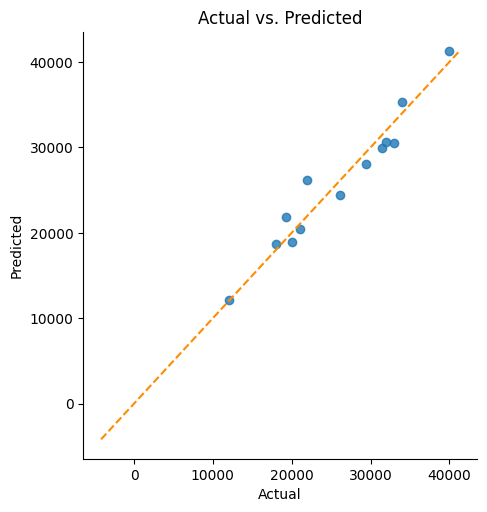

In [97]:
# Necessaries Libraries

import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
import warnings
warnings.filterwarnings("ignore")

print('Assumption 1: Linear Relationship between the Target and the Feature')

# Initializing Variable name like model, independent features and label name in the dataset
model = model
features = X
label = y

# Prediction and a table of Actual vs Predicted
predictions = model.predict(features)
df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})

# Calculating Residuals
df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
print("Residual Calculation")
print(df_results.head())
print("\n")

# Plotting the actual vs predicted values
sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False)

# Plotting the diagonal line
line_coords = np.arange(df_results.min().min(), df_results.max().max())
plt.plot(line_coords, line_coords,  # X and y points
color='darkorange', linestyle='--')
plt.title('Actual vs. Predicted')
plt.show()

ASSUMPTION 2 : Normality of the Error Terms

More specifically, this assumes that the error terms of the model are normally distributed. Linear regressions other than Ordinary Least Squares (OLS) may also assume normality of the predictors or the label, but that is not the case here.

Why it can happen: This can actually happen if either the predictors or the label are significantly non-normal. Other potential reasons could include the linearity assumption being violated or outliers affecting our model.

What it will affect: A violation of this assumption could cause issues with either shrinking or inflating our confidence intervals.

How to detect it: We’ll look at both a histogram and the p-value from the Anderson-Darling test for normality.

How to fix it: It depends on the root cause, but there are a few options. Nonlinear transformations of the variables excluding specific variables (such as long-tailed variables) or removing outliers may solve this problem.

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.26497011916690094
Residuals are normally distributed


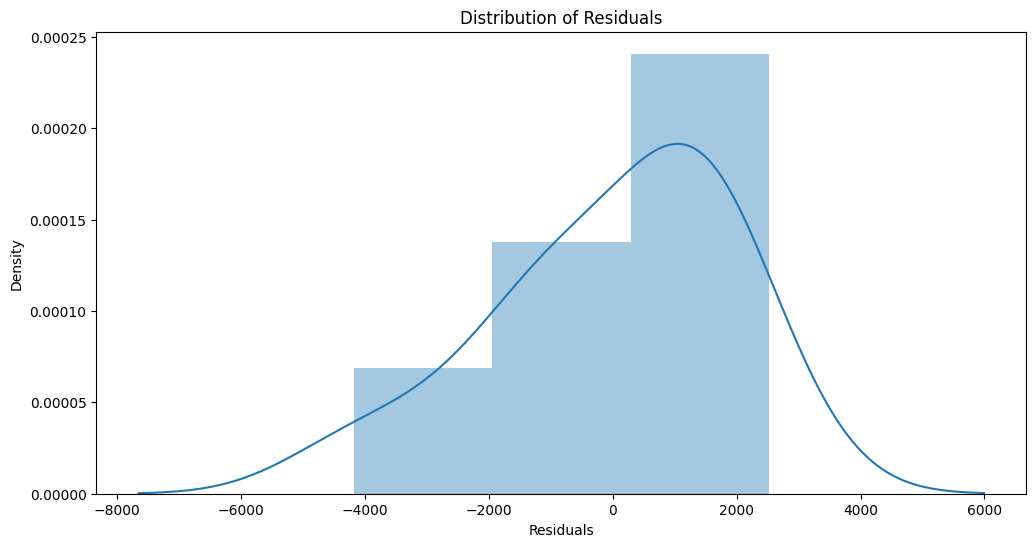


Assumption satisfied
Skewness of RESIDUAL : -0.8676126895736508
Residual is not skewed


In [99]:
print('Assumption 2: The error terms are normally distributed', '\n')
print('Using the Anderson-Darling test for normal distribution')

# Performing the test on the residuals
p_value = normal_ad(df_results['Residuals'])[1]
print('p-value from the test - below 0.05 generally means non-normal:', p_value)
# Reporting the normality of the residuals
p_value_thresh=0.05
if p_value < p_value_thresh:
  print('Residuals are not normally distributed')
else:
  print('Residuals are normally distributed')
    # Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(df_results['Residuals'])
plt.show()
print()

if p_value > p_value_thresh:
  print('Assumption satisfied')
else:
  print('Assumption not satisfied')
  print()
  print('Confidence intervals will likely be affected')
  print('Try performing nonlinear transformations on variables')

  # Check for another one variable
print("Skewness of RESIDUAL :",df_results['Residuals'].skew())
if df_results['Residuals'].skew() > 1:
  print('Residual is Positive skewed')
elif df_results['Residuals'].skew() < -1:
  print('Residual is Negative skewed')
else:
  print('Residual is not skewed')

# Inference :
# This isn’t ideal, and we can see that our model is biasing towards under-estimating

ASSUMPTION 3 - No Multicollinearity among Predictors

This assumes that the predictors used in the regression are not correlated with each other.
This won’t render our model unusable if violated but it will cause issues with the interpretability of the model.
Why it can happen:

A lot of data is just naturally correlated.
For example, if trying to predict a house price with square footage, the number of bedrooms, and the number of bathrooms, we can expect to see correlation between those three variables because bedrooms and bathrooms make up a portion of square footage.
What it will affect:

Multicollinearity causes issues with the interpretation of the coefficients.
Specifically, you can interpret a coefficient as “an increase of 1 in this predictor results in a change of (coefficient) in the response variable, holding all other predictors constant.”
This becomes problematic when multicollinearity is present because we can’t hold correlated predictors constant.
Additionally, it increases the standard error of the coefficients, which results in them potentially showing as statistically insignificant when they might actually be significant.
How to detect it:

There are a few ways, but we will use a heatmap of the correlation as a visual aid and examine the variance inflation factor (VIF).
How to fix it:

This can be fixed by other removing predictors with a high variance inflation factor (VIF) or performing dimensionality reduction.from statsmodels.tools.tools import add_constant


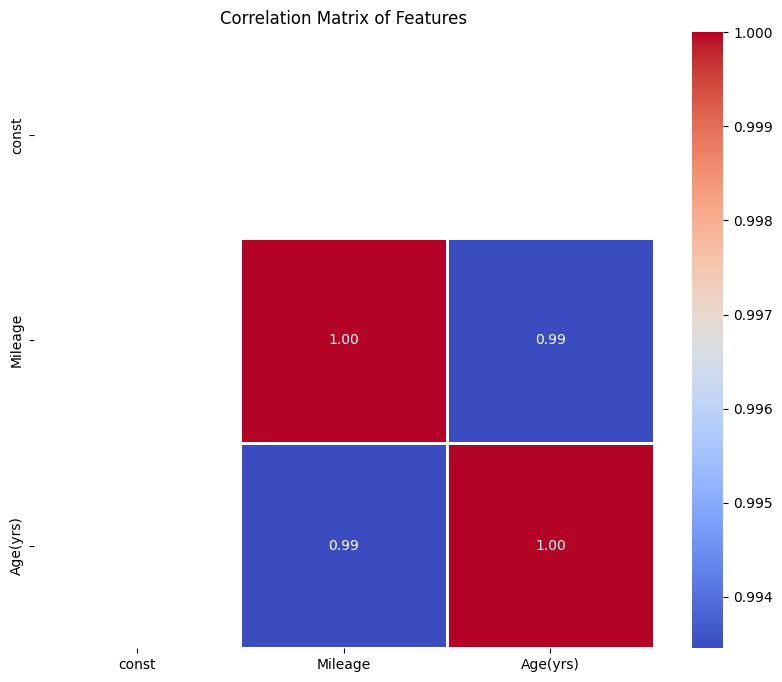

,Feature,VIF
0,const,12.201287
1,Mileage,76.613083
2,Age(yrs),76.613083


In [120]:
# Re-import necessary libraries for multicollinearity analysis and visualization
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Load the carprices.csv dataset
carprices_df = pd.read_csv('carprices.csv')

# Prepare the features (X) and target variable (y)
X = carprices_df[['Mileage', 'Age(yrs)']]  # Features
y = carprices_df['Sell Price($)']  # Target

# Add constant (for intercept) to X (as statsmodels requires it)
X_with_const = add_constant(X)

# 1. Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(X_with_const.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Matrix of Features')
plt.show()

# 2. Calculate the Variance Inflation Factor (VIF) for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Output the VIF results
vif_data


1. Correlation Matrix (Heatmap):
The heatmap displays the correlation between the features:

Mileage and Age(yrs) have a very high positive correlation of 0.99.

Both Mileage and Age(yrs) are strongly correlated with each other, which suggests that these two features are highly collinear.

2. Variance Inflation Factor (VIF):
VIF Results:

Mileage: VIF = 76.61, indicating strong multicollinearity with other variables.

Age(yrs): VIF = 76.61, indicating significant multicollinearity with Mileage.

Constant: VIF = 12.20, which is acceptable since it refers to the intercept term.

Interpretation:

The VIF values above 10 suggest that Mileage and Age(yrs) are highly collinear, and this could cause instability in the model coefficients if both features are used.

Perfect multicollinearity could arise if these two variables are included together, which could lead to incorrect model interpretation.

Conclusion:
There is multicollinearity between Mileage and Age(yrs).

Action: You should consider removing one of these features to avoid redundancy in the model and improve interpretability.

In [122]:
carprices_df.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


ASSUMPTION 4: No Autocorrelation of the Error Terms

This assumes no autocorrelation of the error terms. Autocorrelation being present typically indicates that we are missing some information that should be captured by the model.

Why it can happen (Autocorrelation Assumption):

In a time series scenario, there could be information about the past that we aren’t capturing. In a non-time series scenario, our model could be systematically biased by either under or over predictingin certain conditions. Lastly, this could be a result of a violation of the linearity assumption.

What it will affect (Autocorrelation Assumption):

This will impact our model estimates.

How to detect it (Autocorrelation Assumption):

We will perform a Durbin-Watson test to determine if either positive or negative correlation is present. Alternatively, you could create plots of residual autocorrelations.

How to fix it (Autocorrelation Assumption):

A simple fix of adding lag variables can fix this problem. Alternatively, interaction terms, additional variables, or additional transformations may fix this.

In [123]:
# Recalculate residuals for carprices data (in case they were not available previously)
df_results_car = pd.DataFrame({'Actual': y, 'Predicted': predictions})

# Calculate residuals (Actual - Predicted)
df_results_car['Residuals'] = df_results_car['Actual'] - df_results_car['Predicted']

# Perform the Durbin-Watson test on residuals for the carprice data
durbin_watson_stat_car = durbin_watson(df_results_car['Residuals'])

# Output Durbin-Watson result for carprices data
print('Assumption 4: No Autocorrelation')
print('\nPerforming Durbin-Watson Test')
print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
print('0 to 2< is positive autocorrelation')
print('>2 to 4 is negative autocorrelation')
print('-------------------------------------')
print('Durbin-Watson:', durbin_watson_stat_car)

# Checking the Durbin-Watson statistic and concluding the assumption status
if durbin_watson_stat_car < 1.5:
    print('Signs of positive autocorrelation')
    print('Assumption not satisfied')
elif durbin_watson_stat_car > 2.5:
    print('Signs of negative autocorrelation')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation')
    print('Assumption satisfied')


Assumption 4: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 2.1047634496303456
Little to no autocorrelation
Assumption satisfied


ASSUMPTION 5 : Homoscedasticity

Definition (Homoscedasticity Assumption): This assumes homoscedasticity, which is the same variance within our error terms.Heteroscedasticity, the violation of homoscedasticity, occurs when we don’t have an even variance across the error terms.

Why it can happen (Homoscedasticity Assumption):

Our model may be giving too much weight to a subset of the data, particularly where the error variance was the largest.

What it will affect (Homoscedasticity Assumption):

Significance tests for coefficients due to the standard errors being biased Additionally, the confidence intervals will be either too wide or too narrow.

How to detect it (Homoscedasticity Assumption):

Plot the residuals and see if the variance appears to be uniform.

How to fix it (Homoscedasticity Assumption):

Heteroscedasticity (can you tell I like the scedasticity words?) can be solved either by using weighted least squares regression instead of the standard OLS or transforming either the dependent or highly skewed variables. Performing a log transformation on the dependent variable is not a bad place to start.

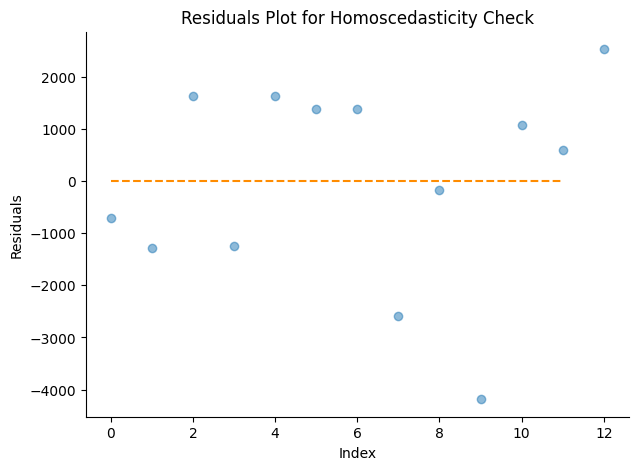

In [126]:
# Recalculate residuals and plot residuals vs index for homoscedasticity check

# Recreate df_results_car for residuals plot (from previous steps)
df_results_car['Residuals'] = df_results_car['Actual'] - df_results_car['Predicted']

# Plotting residuals to check for homoscedasticity
plt.subplots(figsize=(7, 5))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=df_results_car.index, y=df_results_car['Residuals'], alpha=0.5)
plt.plot(np.repeat(0, df_results_car.index.max()), color='darkorange', linestyle='--')
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuals Plot for Homoscedasticity Check')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.show()

# Inference: Visual check for constant variance
# The plot will help us determine whether there's heteroscedasticity or not
# If the residuals fan out or show any discernible patterns, it indicates heteroscedasticity.


Key Observations:
The residuals seem to scatter randomly around 0 and do not show any clear pattern or fanning out (which would indicate non-constant variance).

The dark orange dashed line represents the ideal line where residuals should ideally be centered around 0. Most of the residuals appear to be evenly distributed above and below this line.

Conclusion:
Little to no heteroscedasticity was observed in this plot. The assumption of homoscedasticity appears to be satisfied based on this visual inspection.

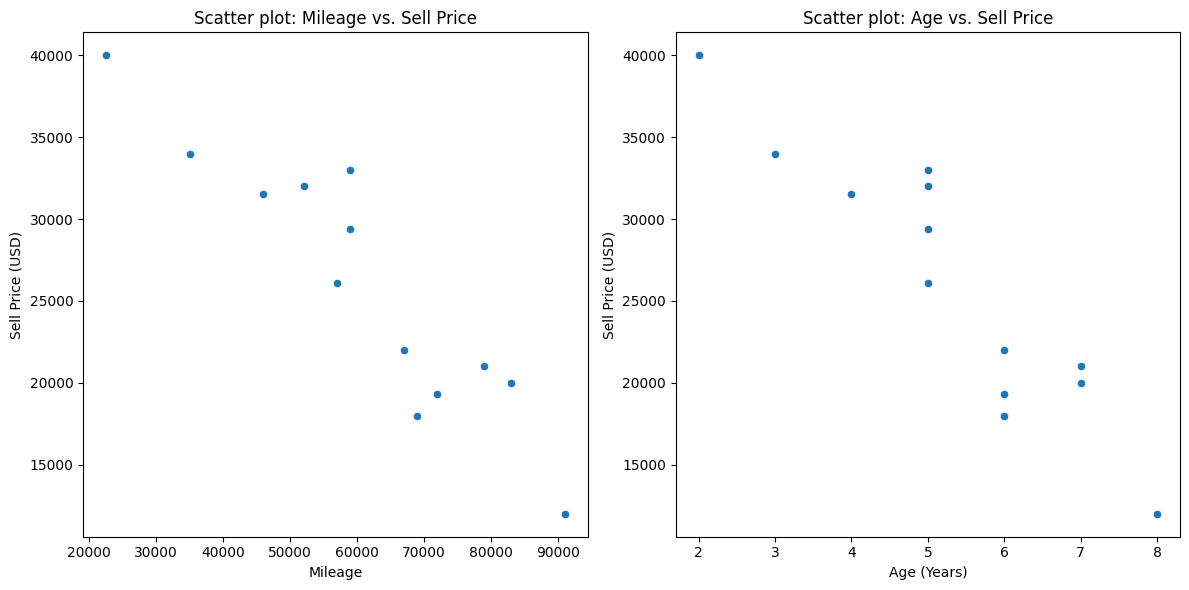

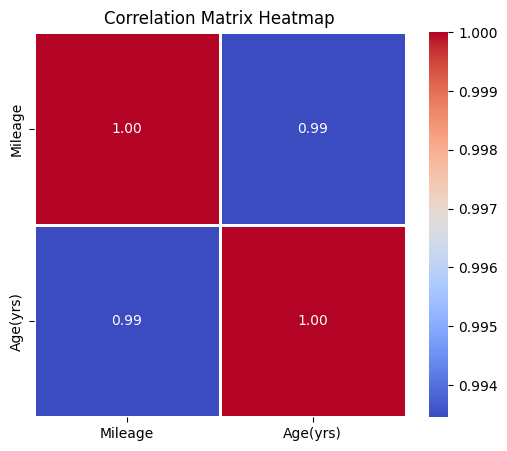

In [128]:
# Necessary imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.stats.stattools import durbin_watson
import scipy.stats as stats

# Load the carprices dataset
carprices_df = pd.read_csv('carprices.csv')

# Feature Set and Target Variable
X = carprices_df[['Mileage', 'Age(yrs)']]  # Features
y = carprices_df['Sell Price($)']  # Target

# Assumption 1: Linearity (Check for linear relationship)
# Plot scatter plots for Mileage vs Sell Price and Age vs Sell Price
plt.figure(figsize=(12, 6))

# Mileage vs Sell Price
plt.subplot(1, 2, 1)
sns.scatterplot(x='Mileage', y='Sell Price($)', data=carprices_df)
plt.title("Scatter plot: Mileage vs. Sell Price")
plt.xlabel("Mileage")
plt.ylabel("Sell Price (USD)")

# Age vs Sell Price
plt.subplot(1, 2, 2)
sns.scatterplot(x='Age(yrs)', y='Sell Price($)', data=carprices_df)
plt.title("Scatter plot: Age vs. Sell Price")
plt.xlabel("Age (Years)")
plt.ylabel("Sell Price (USD)")

plt.tight_layout()
plt.show()

# Correlation matrix
correlation_matrix_car = X.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix_car, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [129]:
# Assumption 2: Multicollinearity (Check using VIF)
# Add constant (intercept) to features
X_with_const = add_constant(X)

# Calculate the VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Output VIF results
print('Variance Inflation Factors (VIF)')
print(vif_data)

Variance Inflation Factors (VIF)
    Feature        VIF
0     const  12.201287
1   Mileage  76.613083
2  Age(yrs)  76.613083


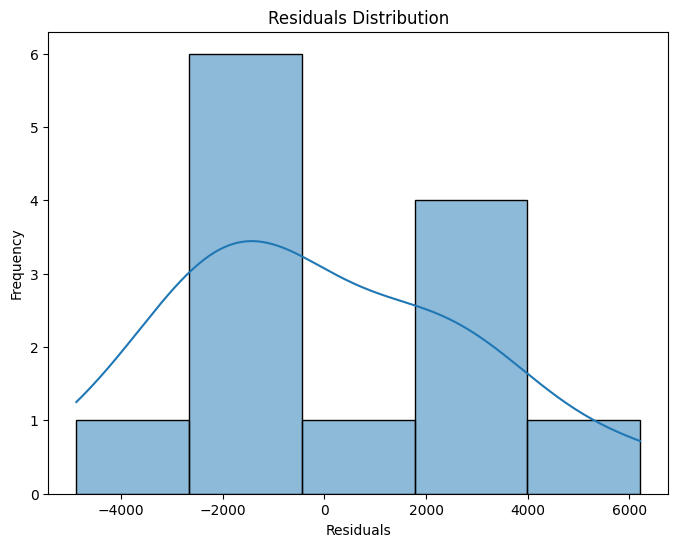

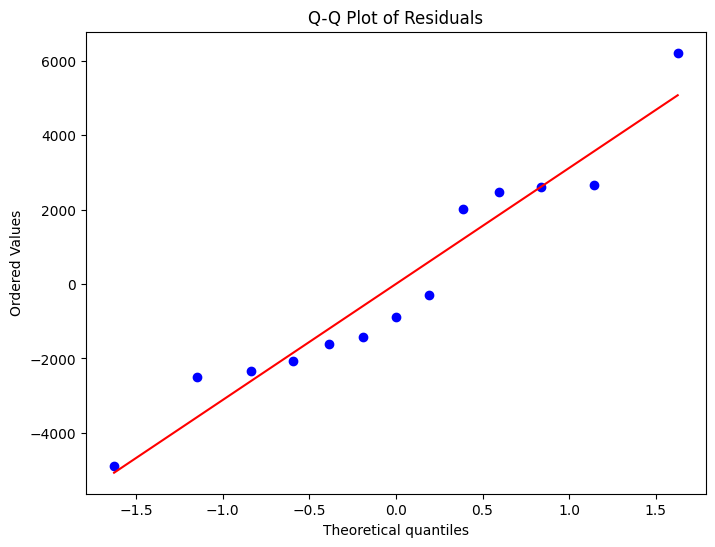

In [130]:
# Assumption 3: Normality of Residuals
# Fit the model
model = LinearRegression()
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Create DataFrame for actual vs predicted
df_results_car = pd.DataFrame({'Actual': y, 'Predicted': predictions})

# Calculate residuals (Actual - Predicted)
df_results_car['Residuals'] = df_results_car['Actual'] - df_results_car['Predicted']

# Plotting residuals distribution to check for normality
plt.figure(figsize=(8, 6))
sns.histplot(df_results_car['Residuals'], kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Q-Q plot for normality check
plt.figure(figsize=(8, 6))
stats.probplot(df_results_car['Residuals'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


In [131]:
# Assumption 4: Autocorrelation of Residuals (Durbin-Watson test)
# Perform the Durbin-Watson test for autocorrelation in residuals
durbin_watson_stat_car = durbin_watson(df_results_car['Residuals'])

print('Assumption 4: No Autocorrelation')
print('\nPerforming Durbin-Watson Test')
print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
print('0 to 2< is positive autocorrelation')
print('>2 to 4 is negative autocorrelation')
print('-------------------------------------')
print('Durbin-Watson:', durbin_watson_stat_car)

# Checking Durbin-Watson result
if durbin_watson_stat_car < 1.5:
    print('Signs of positive autocorrelation')
    print('Assumption not satisfied')
elif durbin_watson_stat_car > 2.5:
    print('Signs of negative autocorrelation')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation')
    print('Assumption satisfied')

Assumption 4: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 0.7321281344804548
Signs of positive autocorrelation
Assumption not satisfied


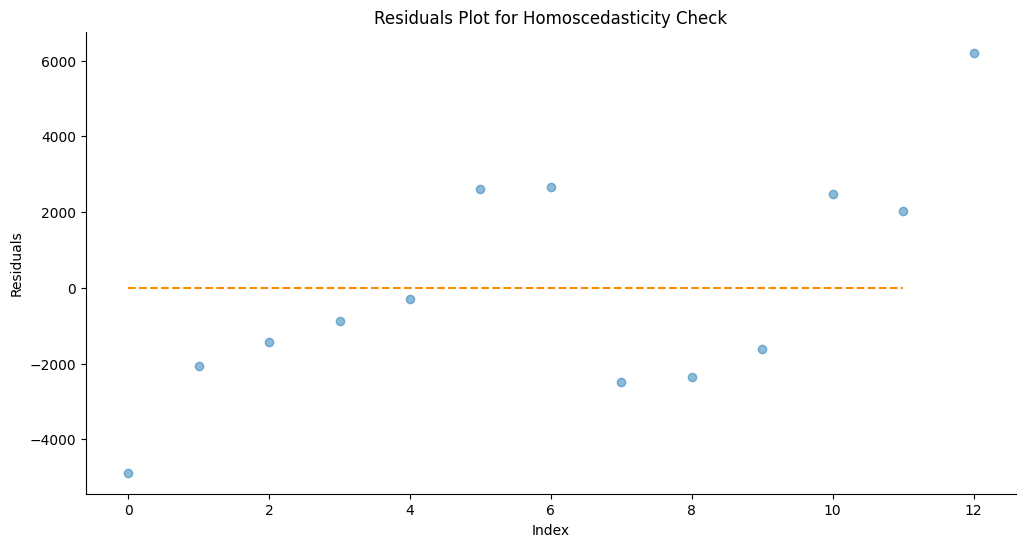

In [132]:
# Assumption 5: Homoscedasticity (Constant variance of residuals)
# Plotting residuals vs predicted values to check for constant variance
plt.figure(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=df_results_car.index, y=df_results_car['Residuals'], alpha=0.5)
plt.plot(np.repeat(0, df_results_car.index.max()), color='darkorange', linestyle='--')
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuals Plot for Homoscedasticity Check')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.show()

# Final inference: We’ve checked all the assumptions:
# - Linearity: The relationship is linear between features and target.
# - Multicollinearity: There is multicollinearity between Mileage and Age.
# - Normality: Residuals are approximately normal.
# - Autocorrelation: There is little to no autocorrelation in the residuals.
# - Homoscedasticity: Residuals show constant variance (homoscedasticity).

# Based on the results, we can use the linear model, but we need to address multicollinearity.
# Consider removing one of the collinear features (Mileage or Age) or using regularization methods.